In [43]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
from sklearn.model_selection import train_test_split

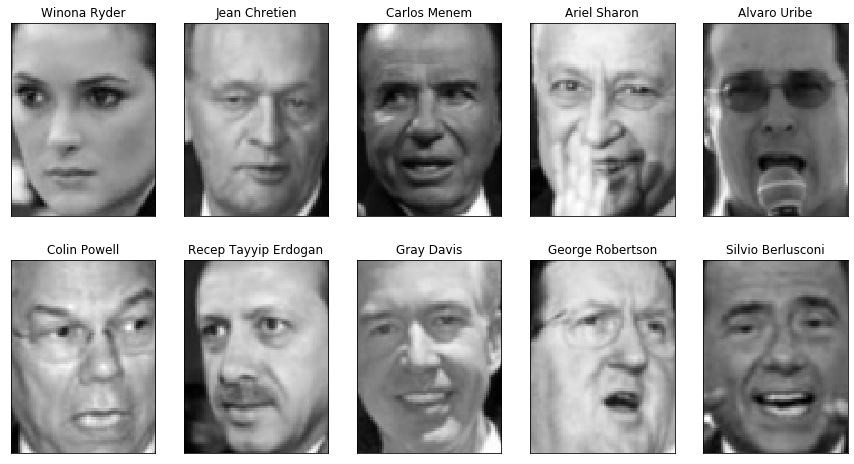

In [44]:
# importing the data set

from sklearn.datasets import fetch_lfw_people
import matplotlib.cm as cm

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap=cm.gray)
    ax.set_title(people.target_names[target])

In [45]:
#finding the properties of dataset

print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [46]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [47]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)


In [49]:
#standardizing the feature vector

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis =0, ddof=0)
x_train = (X_train-mean)/std

x_test = (X_test-mean)/std

In [50]:
#finding the covariance and eigen values

cov = np.dot(x_train.transpose(),x_train)/len(x_train)
values, vectors = np.linalg.eig(cov)

In [51]:
#projecting x_train on eigen space
w = vectors
z = x_train @ w

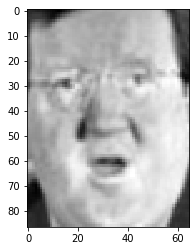

In [52]:
#finding the minimum image on PC1's axis
pc1 = z[:,0]
min_pc1 = np.argmin(pc1,axis =0)
k = np.reshape(x_train[min_pc1], (87, 65))
plt.imshow(k, cmap='gray')

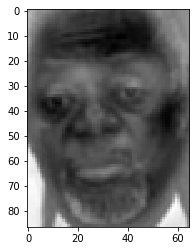

In [53]:
#finding the maximum image on PC1's axis
max_pc1 = np.argmax(pc1,axis =0)
k = np.reshape(x_train[max_pc1], (87, 65))
plt.imshow(k, cmap='gray')

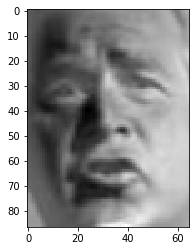

In [54]:
#finding the minimum image on PC2's axis
pc2 = z[:,1]
min_pc2 = np.argmin(pc2,axis =0)
k = np.reshape(x_train[min_pc2], (87, 65))
plt.imshow(k, cmap='gray')

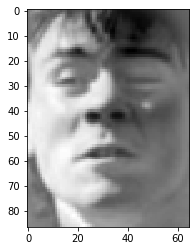

In [55]:
#finding the maximum image on PC2's axis
max_pc2 = np.argmax(pc2,axis =0)
k = np.reshape(x_train[max_pc2], (87, 65))
plt.imshow(k, cmap='gray')

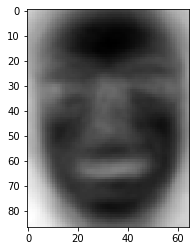

In [64]:
#The primary principle component
k = np.reshape( w[:,0].transpose(),(87, 65))
plt.imshow(k, cmap='gray')

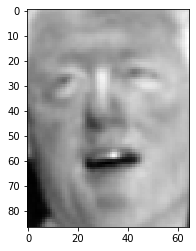

In [66]:
#The x_train[0,:] original image
x_value = (x_train[0,:]+ mean) * std
k = np.reshape( x_value.transpose(),(87, 65))
plt.imshow(k, cmap='gray')

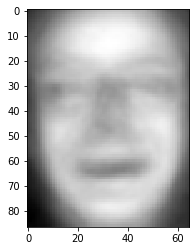

In [67]:
#reconstructing the X train[0,:] image using the primary principle component
t = x_value @ w[:,0]

k = np.reshape(t * w[:,0].transpose(),(87, 65))
plt.imshow(k, cmap='gray')

In [68]:
#finding the k most significant eigen vectors
den = 0
k = []
for i in range(0,len(w)):
    den = den +  (x_value @ w[:,i])


k = 0
for i in range(0,len(w)):
    
    if(k == len(w)):
        break;
        
    num = 0   
    for j in range(0,k):
        num = num + (x_value @ w[:,j])
 
    if(num/den >= 0.95):
        break;
    k=k+1 

print(k)     

134


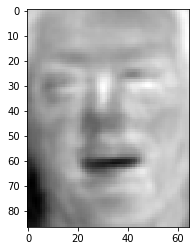

In [69]:
#plotting the result after finding the k most significant eigen vectors
t = x_value @ w[:,:k]

b = np.reshape(t @ w[:,:k].transpose(),(87, 65))
plt.imshow(b, cmap='gray')

In [70]:
#finding the k most significant eigen vectors
den = 0
k = []
for i in range(0,len(w)):
    den = den +  (x_value @ w[:,i])


k = 0
for i in range(0,len(w)):
    
    if(k == len(w)):
        break;
        
    num = 0   
    for j in range(0,k):
        num = num + (x_value @ w[:,j])
 
    if(num/den >= 0.95):
        break;
    k=k+1 

print(k)     

134
